In [10]:
import networkx as nx
import math

In [11]:
gr = nx.Graph()

In [12]:
e_list = [('a','b',2), ('b','c',5), ('a','d',10), ('b','d',8),('c','e',9), ('e','f',7), ('f','g',11), ('g','e',1)]
gr.add_weighted_edges_from(e_list)

{('a', 'b'): Text(7.150601421738458, -2.514372679066775, '2'),
 ('a', 'd'): Text(8.611717281963585, -3.10696853775788, '10'),
 ('b', 'c'): Text(2.1711535264910684, -0.6024492652334196, '5'),
 ('b', 'd'): Text(6.045762612127026, -2.09989175849669, '8'),
 ('c', 'e'): Text(-2.1382413637077557, 0.944894208935791, '9'),
 ('e', 'f'): Text(-5.782870808454653, 2.139322409014697, '7'),
 ('e', 'g'): Text(-7.017071514247875, 2.3637909182430255, '1'),
 ('f', 'g'): Text(-8.76579929420678, 2.915722278724887, '11')}

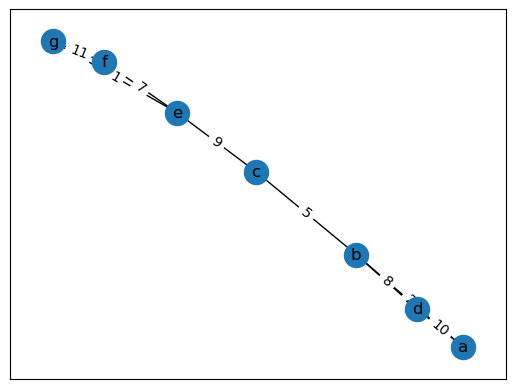

In [13]:
pos = nx.spring_layout(gr, scale=10)
nx.draw_networkx(gr, pos, with_labels=True)
labels = {e: gr.edges[e]['weight'] for e in gr.edges}
nx.draw_networkx_edge_labels(gr, pos, edge_labels=labels)

In [14]:
import heapq
class PriorityQueue():
    
    def __init__(self):
        self.items = []
        self.true_pri = {}
        
    def put(self, item, pri):
        # put the item in the heap w the new priority value
        heapq.heappush(self.items, (pri, item))
                
        # and update our "correct" priority values
        if item in self.true_pri:
            old_pri = self.true_pri[item]
            self.true_pri[item] = min(old_pri, pri) 
        else:
            self.true_pri[item] = pri
            
    def pop(self):
        if len(self.items) == 0:
            return None,None
        pri, item = heapq.heappop(self.items)
        
        while pri != self.true_pri[item]:
            if len(self.items) == 0:
                return None,None
            pri, item = heapq.heappop(self.items)
        
        return pri,item
            
    
    def size(self):
        return len(self.items)                  
        

In [15]:
import networkx as nx
import random as rand
import heapq as heap

class Prim():
    def __init__(self):
        pass
                
        
    def mst(self, Graph, Q):
        # list to store the mst
        mst = []
        t_nodes = []
        INF = 999999
        
        start = rand.choice(list(Graph.nodes))
        
        preds = {}
        preds[start] = None
        
        # initalize distance from start to be 0
        # key = priority
        # value = city
        # item, priority
        dist = {}
        dist[start] = 0
        Q.put(start, dist[start])
               
        # initalize each node in the graph to have no predecessor 
        # and distance to be infinity
        for node in (list(Graph.nodes)):
            if node != start:
                dist[node] = INF
                # need to put all nodes into a priority queue...
                Q.put(node, dist[node]) 
        
        
        while Q.size() > 0 :
            pri, v = Q.pop()
           
            # index error handling
            if v is not None:
                # connect current node to closest thing in tree already
                if v not in t_nodes:
                    t_nodes.append(v)
                    if len(t_nodes) > 1:
                        mst.append((v , preds[v]))
            
                neighbors = list(Graph.neighbors(v))
            
                for neighbor in neighbors:
                    weight = Graph[v][neighbor]['weight']
                    
                    if weight < dist[neighbor]:
                            Q.put(neighbor, weight)
                            preds[neighbor] = v
                            dist[neighbor] = weight         
        
        return mst
    

In [16]:
prim = Prim()
q = PriorityQueue()
lst = prim.mst(gr, q)

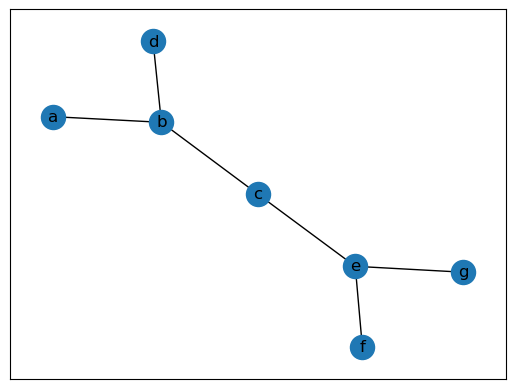

In [18]:
test_mst = nx.Graph()
test_mst.add_edges_from(lst)
nx.draw_networkx(test_mst, with_labels=True)
# labels = {e: test_mst.edges[e]['weight'] for e in gr.edges}
# nx.draw_networkx_edge_labels(test_mst, pos, edge_labels=labels)

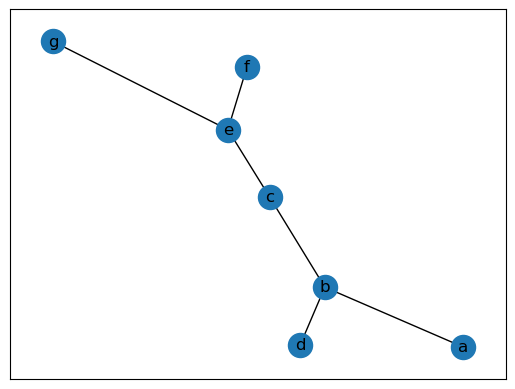

In [42]:
mst = nx.minimum_spanning_tree(gr, weight='weight',algorithm = 'prim', ignore_nan = False) 
nx.draw_networkx(mst)